In [1]:
from torchmetrics.functional import structural_similarity_index_measure
from torchmetrics.image import PeakSignalNoiseRatio
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity
import re 
import json 
import os
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt 

types = ['benchmark', 'every', 'gamma', 'noise-std', 'orientation', 'blue-noise', 'green-noise', 'red-noise', 'pos-orient', 'position', 'range', 'saturation']
types_dict_ngp_on = {type: {} for type in types}
types_dict_ngp_off = {type: {} for type in types}
types_dict_nerfacto_on = {type: {} for type in types}
types_dict_nerfacto_off = {type: {} for type in types}


path_lego_ngp_on = r'C:\Stuff\Results\metrics\ngp_lego_opt_on_metrics.npy'
path_lego_ngp_off = r'C:\Stuff\Results\metrics\ngp_lego_opt_off_metrics.npy'
path_lego_nerfacto_on = r'C:\Stuff\Results\metrics\nerfacto_lego_opt_on_metrics.npy'
path_lego_nerfacto_off = r'C:\Stuff\Results\metrics\nerfacto_lego_opt_off_metrics.npy'

ngp_on = np.load(path_lego_ngp_on, allow_pickle=True).item()
ngp_off = np.load(path_lego_ngp_off, allow_pickle=True).item()
nerfacto_on = np.load(path_lego_nerfacto_on, allow_pickle=True).item()
nerfacto_off = np.load(path_lego_nerfacto_off, allow_pickle=True).item()

for k,v in ngp_on.items():
    for type in types:
        if type in k:
            types_dict_ngp_on[type][k] = v

for k,v in ngp_off.items():
    for type in types:
        if type in k:
            types_dict_ngp_off[type][k] = v

for k,v in nerfacto_on.items():
    for type in types:
        if type in k:
            types_dict_nerfacto_on[type][k] = v

for k,v in nerfacto_off.items():
    for type in types:
        if type in k:
            types_dict_nerfacto_off[type][k] = v                                

benchmark_psnr_ngp_on = types_dict_ngp_on['benchmark']['benchmark-ngp-lego-opt-on']['PSNR']
benchmark_ssim_ngp_on = types_dict_ngp_on['benchmark']['benchmark-ngp-lego-opt-on']['SSIM']
benchmark_lpips_ngp_on = types_dict_ngp_on['benchmark']['benchmark-ngp-lego-opt-on']['LPIPS']

benchmark_psnr_ngp_off = types_dict_ngp_off['benchmark']['benchmark-ngp-lego-opt-off']['PSNR']
benchmark_ssim_ngp_off = types_dict_ngp_off['benchmark']['benchmark-ngp-lego-opt-off']['SSIM']
benchmark_lpips_ngp_off = types_dict_ngp_off['benchmark']['benchmark-ngp-lego-opt-off']['LPIPS']

benchmark_psnr_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_lego_opt_on_benchmark']['PSNR']
benchmark_ssim_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_lego_opt_on_benchmark']['SSIM']
benchmark_lpips_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_lego_opt_on_benchmark']['LPIPS']

benchmark_psnr_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_lego_opt_off_benchmark']['PSNR']
benchmark_ssim_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_lego_opt_off_benchmark']['SSIM']
benchmark_lpips_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_lego_opt_off_benchmark']['LPIPS']

benchmarks_psnr = [benchmark_psnr_ngp_on, benchmark_psnr_ngp_off, benchmark_psnr_nerfacto_on, benchmark_psnr_nerfacto_off]
benchmarks_ssim = [benchmark_ssim_ngp_on, benchmark_ssim_ngp_off, benchmark_ssim_nerfacto_on, benchmark_ssim_nerfacto_off]
benchmarks_lpips = [benchmark_lpips_ngp_on, benchmark_lpips_ngp_off, benchmark_lpips_nerfacto_on, benchmark_lpips_nerfacto_off]


In [2]:
psnr_heatmap_dict_ngp_on = {}
psnr_heatmap_dict_ngp_off = {}
psnr_heatmap_dict_nerfacto_on = {}
psnr_heatmap_dict_nerfacto_off = {}

ssim_heatmap_dict_ngp_on = {}
ssim_heatmap_dict_ngp_off = {}
ssim_heatmap_dict_nerfacto_on = {}
ssim_heatmap_dict_nerfacto_off = {}

lpips_heatmap_dict_ngp_on = {}
lpips_heatmap_dict_ngp_off = {}
lpips_heatmap_dict_nerfacto_on = {}
lpips_heatmap_dict_nerfacto_off = {}

for type, metrics in types_dict_ngp_on.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_ngp_on)
    mean_benchmark_ssim = np.mean(benchmark_ssim_ngp_on)
    mean_benchmark_lpips = np.mean(benchmark_lpips_ngp_on)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_ngp_on[type] = rel_change_psnr
    ssim_heatmap_dict_ngp_on[type] = rel_change_ssim
    lpips_heatmap_dict_ngp_on[type] = rel_change_lpips


for type, metrics in types_dict_ngp_off.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_ngp_off)
    mean_benchmark_ssim = np.mean(benchmark_ssim_ngp_off)
    mean_benchmark_lpips = np.mean(benchmark_lpips_ngp_off)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_ngp_off[type] = rel_change_psnr
    ssim_heatmap_dict_ngp_off[type] = rel_change_ssim
    lpips_heatmap_dict_ngp_off[type] = rel_change_lpips

for type, metrics in types_dict_nerfacto_on.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_nerfacto_on)
    mean_benchmark_ssim = np.mean(benchmark_ssim_nerfacto_on)
    mean_benchmark_lpips = np.mean(benchmark_lpips_nerfacto_on)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_nerfacto_on[type] = rel_change_psnr
    ssim_heatmap_dict_nerfacto_on[type] = rel_change_ssim
    lpips_heatmap_dict_nerfacto_on[type] = rel_change_lpips 

for type, metrics in types_dict_nerfacto_off.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_nerfacto_off)
    mean_benchmark_ssim = np.mean(benchmark_ssim_nerfacto_off)
    mean_benchmark_lpips = np.mean(benchmark_lpips_nerfacto_off)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_nerfacto_off[type] = rel_change_psnr
    ssim_heatmap_dict_nerfacto_off[type] = rel_change_ssim
    lpips_heatmap_dict_nerfacto_off[type] = rel_change_lpips  

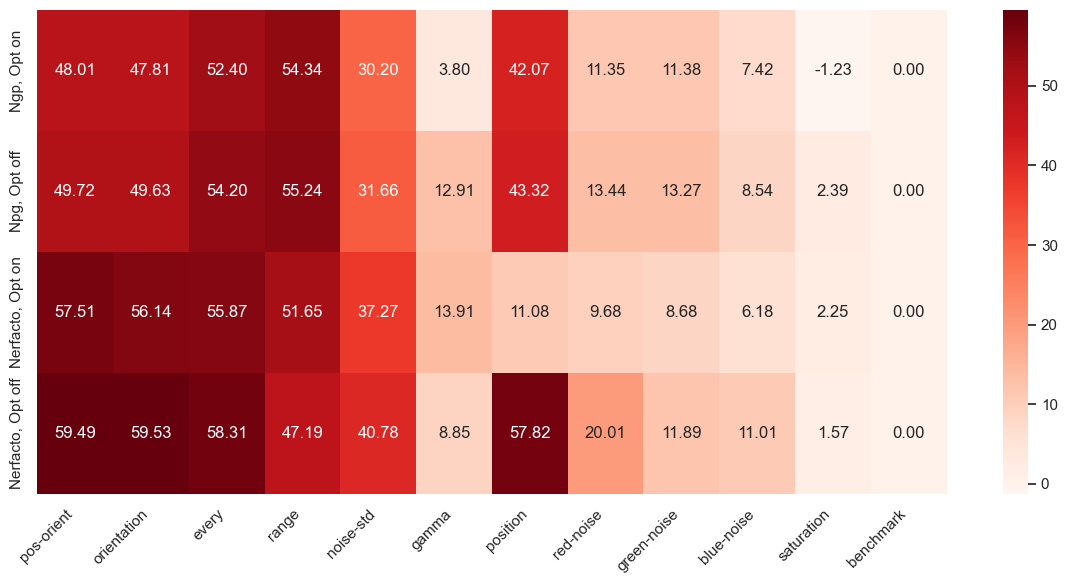

In [40]:
import seaborn as sns

datasets = [heatmap_dict_ngp_on, heatmap_dict_ngp_off, heatmap_dict_nerfacto_on, heatmap_dict_nerfacto_off]

labels, values = zip(*sorted(heatmap_dict_nerfacto_on.items(), key=lambda x: x[1], reverse=True))

# Convert the list of dictionaries to a 2D array
# values_2d_combined = np.array([list(sorted(d.values(), reverse=True)) for d in datasets])
values_2d_combined = np.array([[d[label] for label in labels] for d in datasets])
# Setting Seaborn style for a cooler look
sns.set_theme(style="whitegrid")

# Create the heatmap with Seaborn for improved aesthetics
plt.figure(figsize=(12, 6))
sns.heatmap(values_2d_combined, annot=True, cmap="Reds", cbar=True, fmt=".2f",
            xticklabels=labels, yticklabels=["Ngp, Opt on", "Npg, Opt off", "Nerfacto, Opt on", "Nerfacto, Opt off"])
# sns.color_palette("mako", as_cmap=True)


plt.xticks(rotation=45, ha="right")
# plt.title('Heatmap of Multiple Datasets', pad=20)
# plt.ylabel('Datasets')
# plt.xlabel('Metrics')
plt.tight_layout()
save_dir = r'C:\Stuff\Results\plots'
# plt.savefig(os.path.join(save_dir, f'heatmap_lego.pdf'), format='pdf', dpi=300)

plt.show()


In [3]:
benchmark = 'Original'
red_pns = 'Red channel PnS Noise'
blue_pns = 'Blue channel PnS Noise'
green_pns = 'Green channel PnS Noise'
noise= 'Image Noise'
rot_noise = 'Pose Noise Rotation'
trans_noise = 'Pose Noise Translation'
combined_noise = 'Pose Noise Combined'
satur = 'Saturation Change'
gamma = 'Gamma Correction'
sparce = 'Reduced Image Set'
height = 'Height Rduction'

labels = (combined_noise, rot_noise, sparce, height, noise, gamma, trans_noise, red_pns, green_pns, blue_pns, satur, benchmark)

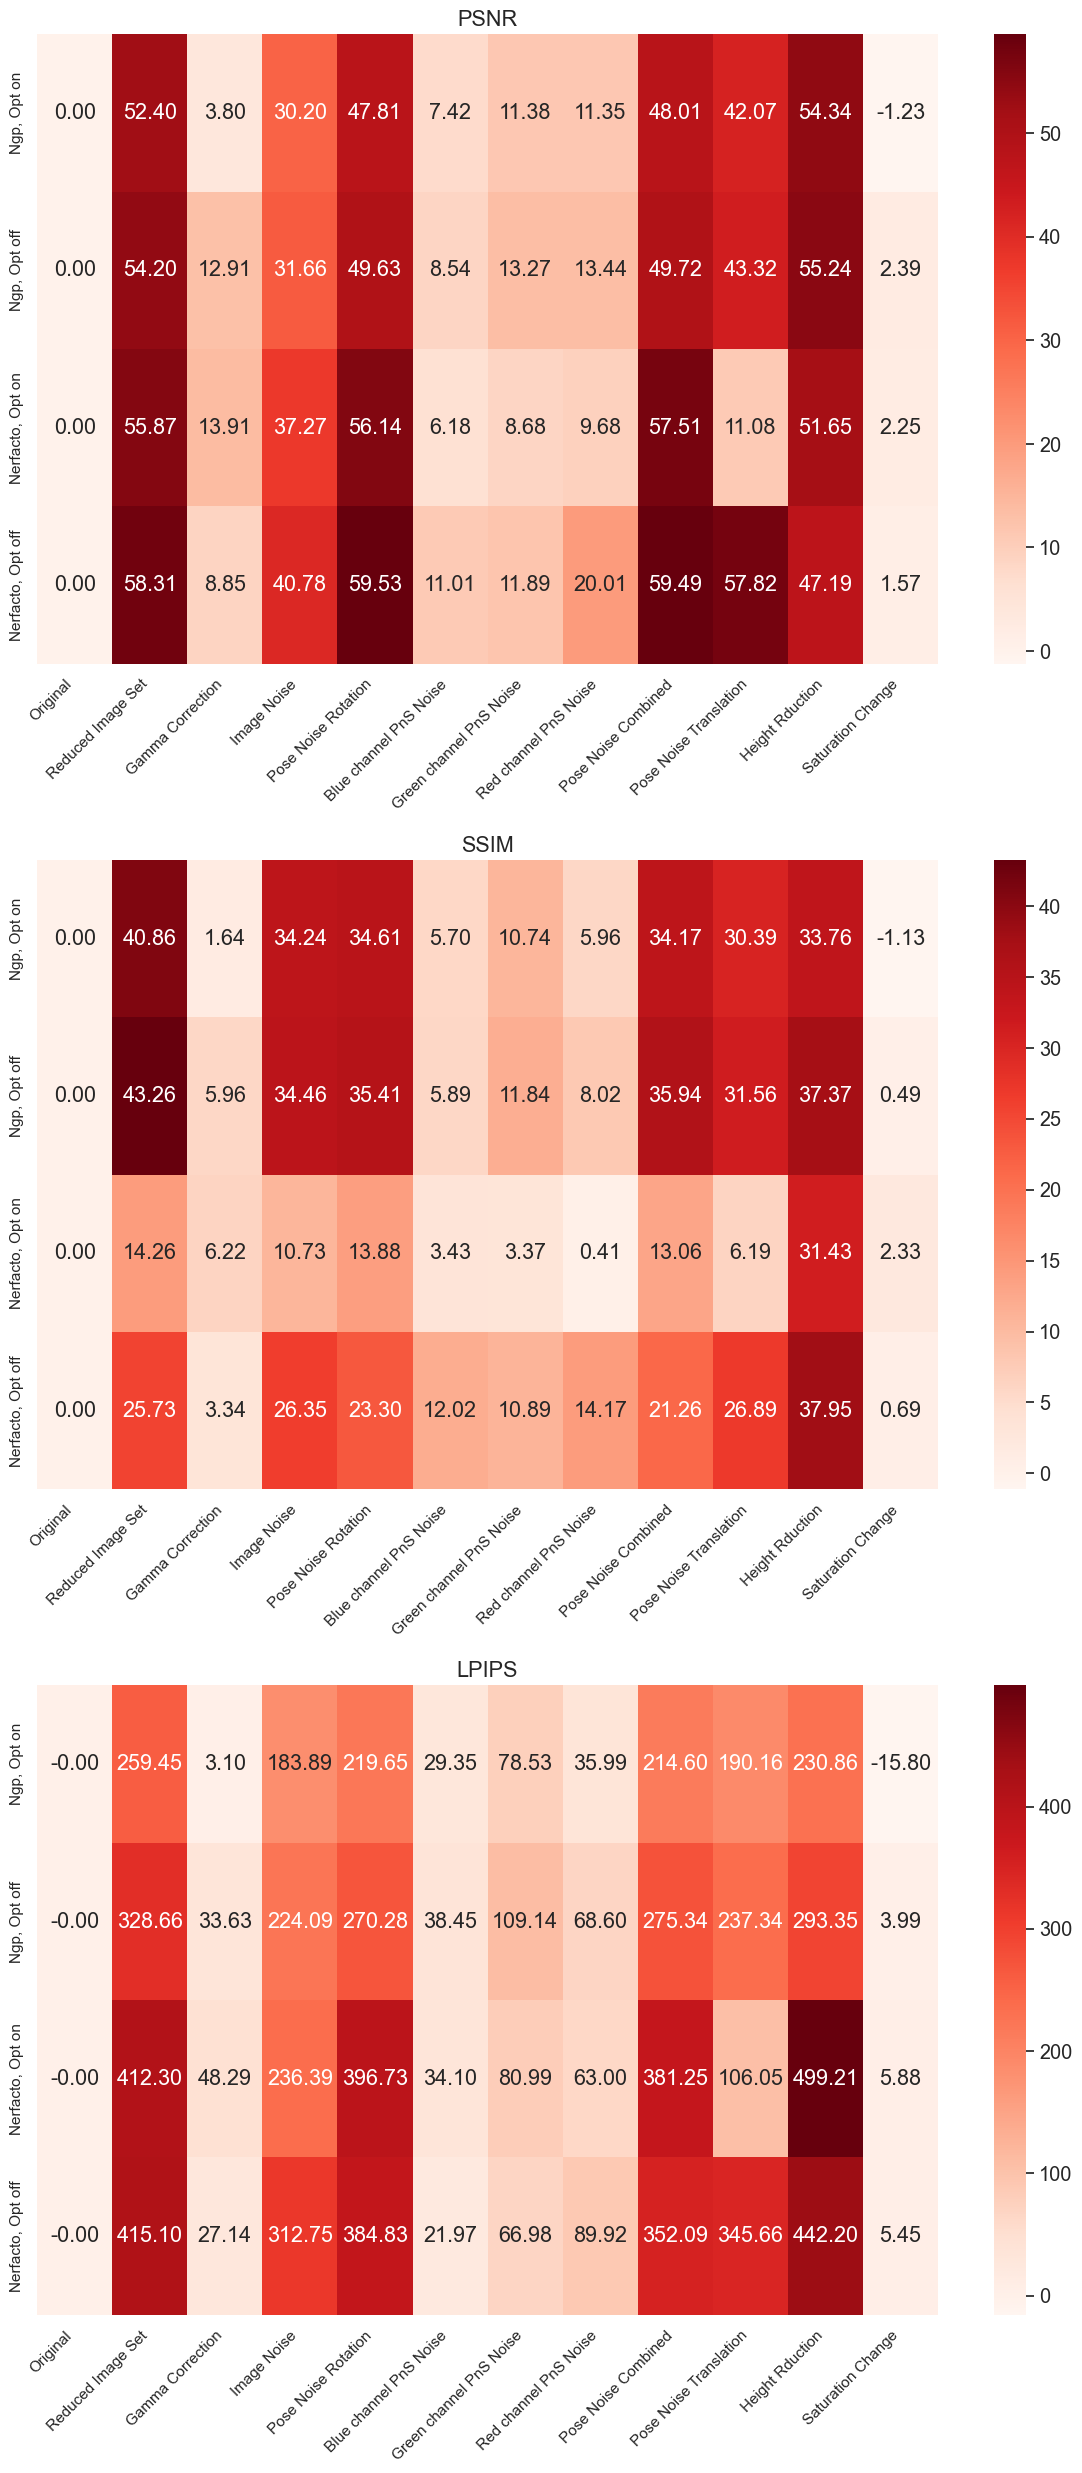

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

psnr_datasets = [psnr_heatmap_dict_ngp_on, psnr_heatmap_dict_ngp_off, psnr_heatmap_dict_nerfacto_on, psnr_heatmap_dict_nerfacto_off]
ssim_datasets = [ssim_heatmap_dict_ngp_on, ssim_heatmap_dict_ngp_off, ssim_heatmap_dict_nerfacto_on, ssim_heatmap_dict_nerfacto_off]
lpips_datasets = [lpips_heatmap_dict_ngp_on, lpips_heatmap_dict_ngp_off, lpips_heatmap_dict_nerfacto_on, lpips_heatmap_dict_nerfacto_off]
# Assuming psnr_datasets, ssim_datasets, and lpips_datasets are your three lists of datasets for PSNR, SSIM, and LPIPS respectively
datasets_metrics = [psnr_datasets, ssim_datasets, lpips_datasets]
metric_labels = ["PSNR", "SSIM", "LPIPS"]
labels = psnr_datasets[0].keys()  # Assuming all datasets have the same keys

sns.set_theme(style="whitegrid")

# Create a figure with three subplots, one for each metric
fig, axes = plt.subplots(3, 1, figsize=(12, 25))  # Adjust figsize as necessary
sublabels = (benchmark, sparce, gamma, noise, rot_noise, blue_pns, green_pns, red_pns, combined_noise, trans_noise, height, satur)

for ax, datasets, metric_label in zip(axes, datasets_metrics, metric_labels):
    values_2d_combined = np.array([[d[label] for label in labels] for d in datasets])
    sns.set(font_scale=1.3)
    sns.heatmap(values_2d_combined, annot=True, cmap="Reds", cbar=True, fmt=".2f",
                xticklabels=sublabels, yticklabels=["Ngp, Opt on", "Ngp, Opt off", "Nerfacto, Opt on", "Nerfacto, Opt off"],
                ax=ax)
    ax.set_title(metric_label)
    ax.set_xticklabels(sublabels, rotation=45, ha="right")

plt.tight_layout()

# Save and show the figure
save_dir = r'C:\Stuff\Results\plots'
plt.savefig(os.path.join(save_dir, 'heatmap_combined_lego.pdf'), format='pdf', dpi=300)
plt.show()
